In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
%matplotlib inline


In [2]:
import falling
import nucleation_and_growth as nandg
import params

Pr =  0.09075  Sc =  999.9999999999999


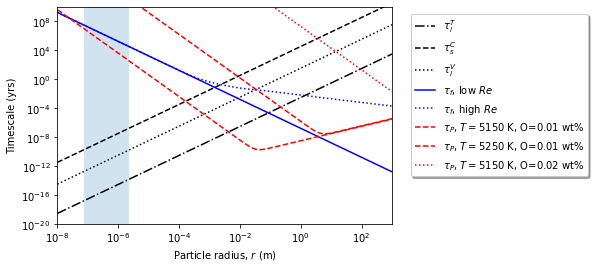

In [3]:
# Using BL estimates without Zhang stuff???

r = np.logspace(-8,3,num=100)
# Calculate timescales for diffusion and falling
tt, ts, tl, tVl = falling.calculate_diffusion_and_freefall_times(r, 
                params.mu, params.g, params.drho, params.rhol, params.kappa, 
                params.Dliq, params.Dsol, params.rf, params.ri)
tVh, PeT, PeC, deltaT, deltaC, tt_liq, tl_liq = falling.calculate_boundary_layers(r, 
                params.mu, params.g, params.drho, params.rhol, params.kappa,
                params.Dliq, params.rf, params.ri)

# Calculate timescale for phase equilibrium
Temp = [5150,5250, 5150, 5250]
Oconc= [0.01, 0.01, 0.02, 0.02]
ttot_r = [] # List to hold results...
for i, o in zip(Temp, Oconc):
    ttot_r.append(nandg.tau_phase_r(r, i, o))

fig, ax = plt.subplots()
plt.xlabel("Particle radius, $r$ (m)")
plt.ylabel("Timescale (yrs)")
plt.xlim([1e-8 ,1e3])
plt.ylim([1e-20,1e10])
plt.loglog(r, tt , color="black", linestyle="dashdot", label="$\\tau_l^T$")
plt.loglog(r, ts , color="black", linestyle="--"     , label="$\\tau_s^C$")
plt.loglog(r, tl , color="black", linestyle=":"      , label="$\\tau_l^V$")
plt.loglog(r, tVl, color="blue" , linestyle="-"      , label="$\\tau_f$, low $Re$")
plt.loglog(r, tVh, color="blue" , linestyle=":"      , label="$\\tau_f$, high $Re$")
plt.loglog(r, ttot_r[0], color="red" , linestyle="--"   , label="$\\tau_P$, $T = 5150$ K, O=0.01 wt%")
plt.loglog(r, ttot_r[1], color="red" , linestyle="--"   , label="$\\tau_P$, $T = 5250$ K, O=0.01 wt%")
plt.loglog(r, ttot_r[2], color="red" , linestyle=":"    , label="$\\tau_P$, $T = 5150$ K, O=0.02 wt%")

plt.legend(loc='upper right', bbox_to_anchor=(1.6, 0.99),
          fancybox=True, shadow=True)

# Create a Rectangle patch
rect = matplotlib.patches.Rectangle((7.406621140274367e-08, 1e-21), (2.3421789543362724e-06-7.406621140274367e-08), 1e20, alpha=0.2)
ax.add_patch(rect)
file2="Regime1.pdf"
plt.savefig(file2, format='pdf',bbox_inches="tight")
plt.show()

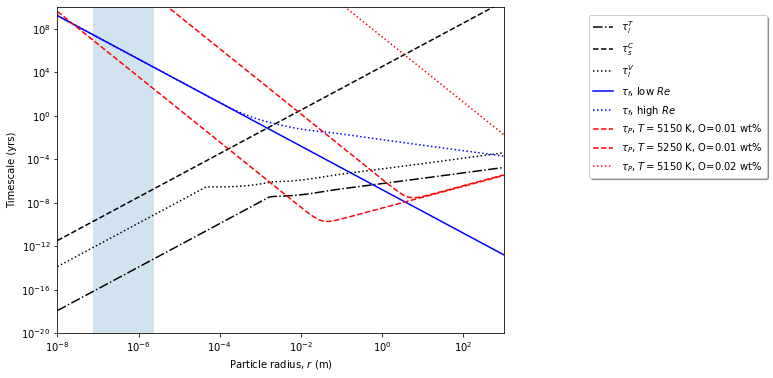

In [4]:
# Now using BL estimates for the liquid

r = np.logspace(-8,3,num=100)
# Calculate timesclaes for diffusion and falling
tt, ts, tl, tVl = falling.calculate_diffusion_and_freefall_times(r, 
                params.mu, params.g, params.drho, params.rhol, params.kappa, 
                params.Dliq, params.Dsol, params.rf, params.ri)
tVh, PeT, PeC, deltaT, deltaC, tt_liq, tl_liq = falling.calculate_boundary_layers(r, 
                params.mu, params.g, params.drho, params.rhol, params.kappa,
                params.Dliq, params.rf, params.ri)

# Calculate timescale for phase equilibrium
Temp = [5150,5250, 5150, 5250]
Oconc= [0.01, 0.01, 0.02, 0.02]
ttot_r = [] # List to hold results...
for i, o in zip(Temp, Oconc):
    ttot_r.append(nandg.tau_phase_r(r, i, o))


fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel("Particle radius, $r$ (m)")
plt.ylabel("Timescale (yrs)")
plt.xlim([1e-8 ,1e3])
plt.ylim([1e-20,1e10])
plt.loglog(r, tt_liq , color="black", linestyle="dashdot", label="$\\tau_l^T$")
plt.loglog(r, ts , color="black", linestyle="--"     , label="$\\tau_s^C$")
plt.loglog(r, tl_liq , color="black", linestyle=":"      , label="$\\tau_l^V$")
plt.loglog(r, tVl, color="blue" , linestyle="-"      , label="$\\tau_f$, low $Re$")
plt.loglog(r, tVh, color="blue" , linestyle=":"      , label="$\\tau_f$, high $Re$")
plt.loglog(r, ttot_r[0], color="red" , linestyle="--"   , label="$\\tau_P$, $T = 5150$ K, O=0.01 wt%")
plt.loglog(r, ttot_r[1], color="red" , linestyle="--"   , label="$\\tau_P$, $T = 5250$ K, O=0.01 wt%")
plt.loglog(r, ttot_r[2], color="red" , linestyle=":"    , label="$\\tau_P$, $T = 5150$ K, O=0.02 wt%")
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 0.99),
          fancybox=True, shadow=True)

rect = matplotlib.patches.Rectangle((7.406621140274367e-08, 1e-21), (2.3421789543362724e-06-7.406621140274367e-08), 1e20, alpha=0.2)
ax.add_patch(rect)
file2="Regime2.pdf"
plt.savefig(file2, format='pdf',bbox_inches="tight")
plt.show()

## Conclusions from these graphs: 
We are assuming that the particles remain the same radius as they fall through the F-layer. 

We also assume that the system has overcome the initial homogeneous nucleation barrier. 

1. If solid diffusion is relevant it is always the limiting process.
2. If solid diffusion is not relevant and the BL plot is relevant then the system is basically always in phase equilibrium.
3. If the particle radius changes as it moves through the F-layer this will not change the fact that solid diffusion is slower than liquid or thermal diffusion. 